In [1]:
import numpy as np
import librosa

In [3]:
import IPython.display as ipd

In [4]:
from model import VAE

model_load_directory = "saved_models/first"
vae = VAE.load(model_load_directory)
print("loaded model")

Num GPUs Available:  0


2021-09-21 11:24:50.574484: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-21 11:24:50.608948: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb539dcbc00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-21 11:24:50.608965: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


loaded model


In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from numpy import linspace
import soundfile as sf
import time

In [15]:
def generate_random_z_vect(seed=1001,size_z=1,scale=1.0):
    np.random.seed(seed)
    x = np.random.uniform(low=(scale * -1.0), high=scale, size=(size_z,VECTOR_DIM))
    return x

def testass(a):
    but=False
    con = np.array([])
    nim = a.shape[0]
    for i in range(nim):
        im = a[i]
        im = np.squeeze(im)
        if not but:
            con=im
            but=True
        else:
            con = np.concatenate((con,im), axis=1)
    return np.squeeze(con)

def specass(a,spec):
    but=False
    con = np.array([])
    nim = a.shape[0]
    for i in range(nim-1):
        im = a[i]
        im = np.squeeze(im)
        if not but:
            con=im
            but=True
        else:
            con = np.concatenate((con,im), axis=1)
    diff = spec.shape[1]-(nim*shape)
    a = np.squeeze(a)
    con = np.concatenate((con,a[-1,:,-diff:]), axis=1)
    return np.squeeze(con)

def chopspec(spec):
    dsa=[]
    for i in range(spec.shape[1]//shape):
        im = spec[:,i*shape:i*shape+shape]
        im = np.reshape(im, (im.shape[0],im.shape[1],1))
        dsa.append(im)
    imlast = spec[:,-shape:]
    imlast = np.reshape(imlast, (imlast.shape[0],imlast.shape[1],1))
    dsa.append(imlast)
    return np.array(dsa, dtype=np.float32)

def deprep(S):
    S = denormalize(S)+ref_level_db
    S = librosa.db_to_power(S)
    wv = GRAD(np.expand_dims(S,0), melspecfunc, maxiter=2500, evaiter=10, tol=1e-8)
    return np.array(np.squeeze(wv))


def towave_from_z(spec, name, path='../content/', show=False, save=False):
    specarr = chopspec(spec)
    print(specarr.shape)
    a = specarr
    print('Generating...')
    print('Assembling and Converting...')
    a = specass(a,spec)
    awv = deprep(a)
    if save:
        print('Saving...')
        pathfin = f'{path}/{name}'
        sf.write(f'{pathfin}.wav', awv, sr)
        print('Saved WAV!')
    if show:
        fig, axs = plt.subplots(ncols=1)
        axs.imshow(np.flip(a, -2), cmap=None)
        axs.axis('off')
        axs.set_title('Decoder Synthesis')
        plt.show()
    return awv

In [6]:
def interp_gen(num_samples=1, _use_seed=False, _seed=1001, interp_steps=5, z_scale=-2.2, interp_scale=1.2, save=False, name="one_shot", path="/content/"):
    use_seed = _use_seed #@param {type:"boolean"}
    seed =  _seed #@param {type:"slider", min:0, max:4294967295, step:1}
    num_interpolation_steps = interp_steps#@param {type:"integer"}
    scale_z_vectors =  z_scale #@param {type:"slider", min:-5.0, max:5.0, step:0.1}
    scale_interpolation_ratio =  interp_scale #@param {type:"slider", min:-5.0, max:5.0, step:0.1}
    save_audio = save #@param {type:"boolean"}
    audio_name = name #@param {type:"string"}
    audio_save_directory = path #@param {type:"string"}

    # generate points in latent space as input for the generator
    def generate_latent_points(latent_dim, n_samples, n_classes=10):
    	# generate points in the latent space
    	x_input = randn(latent_dim * n_samples)
    	# reshape into a batch of inputs for the network
    	z_input = x_input.reshape(n_samples, latent_dim)
    	return z_input

    # uniform interpolation between two points in latent space
    def interpolate_points(p1, p2,scale, n_steps=10):
    	# interpolate ratios between the points
    	ratios = linspace(-scale, scale, num=n_steps)
    	# linear interpolate vectors
    	vectors = list()
    	for ratio in ratios:
    		v = (1.0 - ratio) * p1 + ratio * p2
    		vectors.append(v)
    	return asarray(vectors)

    y = np.random.randint(0, 2**32-1)
    if not use_seed:
      pts = generate_random_z_vect(y,num_samples,scale_z_vectors)
    else:
      pts = generate_random_z_vect(seed,num_samples,scale_z_vectors)

    # interpolate points in latent space
    interpolated = interpolate_points(pts[0], pts[1], scale_interpolation_ratio, num_interpolation_steps)
    #print(np.shape(interpolated))
    interp = np.array(vae.sample_from_latent_space(interpolated))
    assembled_spec = testass(interp)
    towave_from_z(assembled_spec,audio_name,audio_save_directory,show=False, save=save_audio)
    #print(np.shape(assembled_spec))

    if not use_seed:
      print("Generated from seed:", y)
    else:
      print("Generated from seed:", seed)

In [31]:
interp_gen(num_samples=10, _use_seed=False, _seed=1001, interp_steps=30, z_scale=-1.5, interp_scale=1.0, save=True, name="interp_test2", path="results")


(42, 256, 128, 1)
Generating...
Assembling and Converting...


  0%|                                                                                                                                                                                           | 0/2500 [00:00<?, ?it/s]/Users/jerms/.local/share/virtualenvs/new_vae-B5i6JtKw/lib/python3.8/site-packages/torchaudio/functional/functional.py:432: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [06:50<00:00,  6.09it/s, loss=0.379, spectral_convergence=-9.52]

Saving...
Saved WAV!
Generated from seed: 1278625498


In [10]:
learning_rate = 0.0005 #@param {type:"raw"}
num_epochs_to_train =  40#@param {type:"integer"}
batch_size = 64 #@param {type:"integer"}
vector_dimension = 64 #@param {type:"integer"}

hop=256               #hop size (window size = 4*hop)
sr=44100              #sampling rate
min_level_db=-100     #reference values to normalize data
ref_level_db=20

LEARNING_RATE = learning_rate
BATCH_SIZE = batch_size
EPOCHS = num_epochs_to_train
VECTOR_DIM=vector_dimension

shape=128           #length of time axis of split specrograms
spec_split=1


In [17]:
def denormalize(S):
  return (((np.clip(S, -1, 1)+1.)/2.) * -min_level_db) + min_level_db


In [19]:
def GRAD(spec, transform_fn, samples=None, init_x0=None, maxiter=1000, tol=1e-6, verbose=1, evaiter=10, lr=0.002):

    spec = torch.Tensor(spec)
    samples = (spec.shape[-1]*hop)-hop

    if init_x0 is None:
        init_x0 = spec.new_empty((1,samples)).normal_(std=1e-6)
    x = nn.Parameter(init_x0)
    T = spec

    criterion = nn.L1Loss()
    optimizer = torch.optim.Adam([x], lr=lr)

    bar_dict = {}
    metric_func = spectral_convergence
    bar_dict['spectral_convergence'] = 0
    metric = 'spectral_convergence'

    init_loss = None
    with tqdm(total=maxiter, disable=not verbose) as pbar:
        for i in range(maxiter):
            optimizer.zero_grad()
            V = transform_fn(x)
            loss = criterion(V, T)
            loss.backward()
            optimizer.step()
            lr = lr*0.9999
            for param_group in optimizer.param_groups:
              param_group['lr'] = lr

            if i % evaiter == evaiter - 1:
                with torch.no_grad():
                    V = transform_fn(x)
                    bar_dict[metric] = metric_func(V, spec).item()
                    l2_loss = criterion(V, spec).item()
                    pbar.set_postfix(**bar_dict, loss=l2_loss)
                    pbar.update(evaiter)

    return x.detach().view(-1).cpu()

In [22]:
from torchaudio.transforms import MelScale, Spectrogram

specobj = Spectrogram(n_fft=4*hop, win_length=4*hop, hop_length=hop, pad=0, power=2, normalized=False)
specfunc = specobj.forward
melobj = MelScale(n_mels=hop, sample_rate=sr, f_min=0.)
melfunc = melobj.forward
def melspecfunc(waveform):
    specgram = specfunc(waveform)
    mel_specgram = melfunc(specgram)
    return mel_specgram

/Users/jerms/.local/share/virtualenvs/new_vae-B5i6JtKw/lib/python3.8/site-packages/torchaudio/transforms.py:271: UserWarning: Initialization of torchaudio.transforms.MelScale with an unset weight `n_stft=None` is deprecated and will be removed in release 0.10. Please set a proper `n_stft` value. Typically this is `n_fft // 2 + 1`. Refer to https://github.com/pytorch/audio/issues/1510 for more details.
  warnings.warn(


In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from functools import partial
import math
import heapq

In [28]:
def spectral_convergence(input, target):
    return 20 * ((input - target).norm().log10() - target.norm().log10())

In [36]:
def normalize(S):
    return np.clip((((S - min_level_db) / -min_level_db)*2.)-1., -1, 1)

def get_spectrogram(wv,HOP_SIZE=192):
    S = np.array(torch.squeeze(melspecfunc(torch.Tensor(wv).view(1,-1))).detach().cpu())
    S = librosa.power_to_db(S)-ref_level_db
    return normalize(S)

In [34]:
X_tr = np.load('../gtzan_tr.npy')

In [77]:
first = X_tr[0]
aspec = np.array([np.expand_dims(get_spectrogram(first), -1)])
new_shape = ((0, 0), (0, 0), (0, 3), (0, 0))
first_spec = np.pad(aspec, pad_width=new_shape, mode='constant', constant_values=0)

In [98]:
aspec.shape

(1, 256, 173, 1)

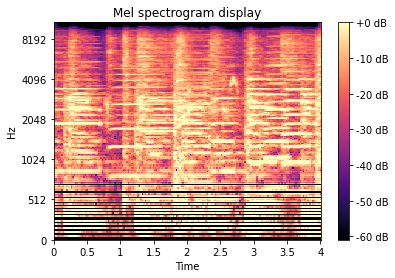

In [101]:
fig, ax = plt.subplots()
img = librosa.display.specshow(denormalize(aspec).reshape(256, 173), y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [100]:
ipd.Audio(first, rate=22050)

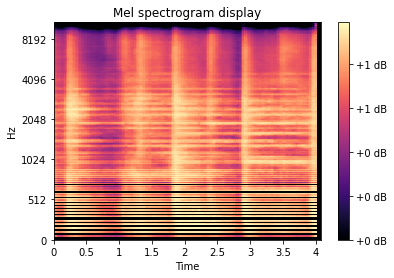

In [97]:
fig, ax = plt.subplots()
img = librosa.display.specshow(first_reconstructed_space, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [103]:
second_reconstructed_space = reconstructed[1]

In [57]:
reconstructed = vae.reconstruct(first_spec)

In [88]:
first_reconstructed_space = reconstructed[0].reshape(256, 176)

In [89]:
denormed = denormalize(first_reconstructed_space)

In [90]:
denormed.shape

(256, 176)

In [96]:
y_inv = librosa.griffinlim(first_reconstructed_space)

In [102]:
ipd.Audio(y_inv, rate=22050)

In [76]:
TIME_AXIS_LENGTH = 176
spec_split = 1

def splitcut(data):
  ls = []
  mini = 0
  minifinal = spec_split*TIME_AXIS_LENGTH  #max spectrogram length
  for i in range(data.shape[0]-1):
    if data[i].shape[1]<=data[i+1].shape[1]:
      mini = data[i].shape[1]
    else:
      mini = data[i+1].shape[1]
    if mini>=1*TIME_AXIS_LENGTH and mini<minifinal:
      minifinal = mini
  for i in range(data.shape[0]):
    x = data[i]
    if x.shape[1]>=1*TIME_AXIS_LENGTH:
      for n in range(x.shape[1]//minifinal):
        ls.append(x[:,n*minifinal:n*minifinal+minifinal,:])
      ls.append(x[:,-minifinal:,:])
  return np.array(ls)

In [78]:
adata = splitcut(first_spec)

In [79]:
adata.shape

(2, 256, 176, 1)

In [80]:
towave_from_z(adata, "test")

ValueError: cannot reshape array of size 45056 into shape (2,128,1)

# Dataloading

In [109]:
import tensorflow as tf

print(tf.__version__)

dataset = tf.data.Dataset.from_tensor_slices(X_tr)
print(dataset)
print("Original dataset")


2.3.1


ValueError: Cannot create a tensor proto whose content is larger than 2GB.

In [2]:
import tensorflow_datasets as tfds


In [31]:
# Construct a tf.data.Dataset
raw_train, raw_validation, raw_test = tfds.load('gtzan', split=["train[:80%]","train[80%:90%]","train[90%:]"])

In [18]:
sr = 22050
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

def augment_audio(x):
    audio = x['audio']
    print(audio.eval())
    augment = Compose([
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.15, p=0.5),
        TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
        PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
        Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
    ])
    return augment(samples=audio, sample_rate=sr)


In [32]:
raw_train = raw_train.shuffle(1000).batch(128).prefetch(10).take(5)

In [33]:
def format_audio(audio, label):
    

InvalidArgumentError: Cannot batch tensors with different shapes in component 0. First element had shape [661504] and element 1 had shape [661794].